G1  X5.3085000000000  Y5.3085000000000  Z15.0000000000000  F300.0000000000000
G1  X5.3085000000000  Y5.3085000000000  Z0.0000000000000  F120.0000000000000
G1  X7.8085000000000  Y5.3085000000000  Z0.0000000000000  F300.0000000000000
G1  X7.7886805705715  Y5.5573481042610  Z0.0030049491388  F300.0000000000000
G1  X7.7305042576410  Y5.7994645690686  Z0.0069474281481  F300.0000000000000
G1  X7.6357174624520  Y6.0283927218609  Z0.0118893808039  F300.0000000000000
G1  X7.5071604785785  Y6.2380787406506  Z0.0179343952359  F300.0000000000000
G1  X7.3486805763507  Y6.4230557285913  Z0.0252273862378  F300.0000000000000
G1  X7.1650143995301  Y6.5786098359349  Z0.0339523930047  F300.0000000000000
G1  X6.9616432691259  Y6.7009233668255  Z0.0443266060655  F300.0000000000000
G1  X6.7446258146023  Y6.7871905114899  Z0.0565881517508  F300.0000000000000
G1  X6.5204130431182  Y6.8357021802418  Z0.0709747974008  F300.0000000000000
G1  X6.2956514918563  Y6.8458973588216  Z0.0876909291692  F300.000000000000

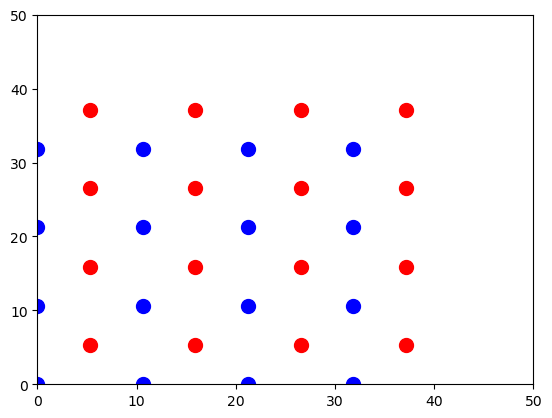

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

box_x = [0, 50, 50, 0, 0]
box_y = [0, 0, 60, 60, 0]
plt.xlim(0, 50)
plt.ylim(0, 50)
offset = 10.617
operations = 0
'''
def randomcolor(i):
    if i%2==0:
        return 'bo'
    else:
        return 'ro'
'''    

def plot_dots_in_box(dot_coordinates):
    for x, y in dot_coordinates:
        plt.plot(x, y, 'bo', markersize = 10)
def plot_dots_in_box_interweaved(dot_coordinates):
    for x, y in dot_coordinates:
        plt.plot(x, y, 'ro', markersize = 10)

def skein(x_coord, y_coord, z_coord):
    # Parameters for the path calculation
    step = 0.1  # resolution, time step period for each xyz calculation
    k = 4
    dp = 0.08  # change to modify ER, minimum distance between fibers, center to center
    h = 0.3  # height of each layer
    c1 = 2  # standard deviation coefficient
    H = 10  # total height of the skein


    p = dp / np.pi
    period = (H - h) / p
    n = (k - 1) / k
    t = np.arange(0, period + step, step)
    t1 = period * np.array([0, 1/5, 2/5, 3/5, 4/5, 1])
    r1 = H * np.array([0.25, 0.4, 0.55, 0.4, 0.36, 0.25])
    pol = CubicSpline(t1, r1)
    a = pol(t)
    c = a / c1
    theta = t
    rho = a * np.cos(n * t)
    z = h * (np.exp(-(rho ** 2 / (2 * c ** 2))))
    z = z - z[0]
    dz = p * theta
    z = z + dz
    x, y = rho * np.cos(theta), rho * np.sin(theta)

    #s = np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2))
    #er = s / H
    #print(f"Effective radius (ER): {er}")

    speed = 5 * 60  # mm/min

    motion = np.column_stack((x, y, z))
    motion[:, 0] += x_coord
    motion[:, 1] += y_coord
    motion[:, 2] += z_coord

    skeingcode = ""
    for i in range(len(motion)):
        x_str = f"X{motion[i, 0]:2.13f}"
        y_str = f"Y{motion[i, 1]:2.13f}"
        z_str = f"Z{motion[i, 2]:2.13f}"
        f_str = f"F{speed:2.13f}"
        skeingcode += f"G1  {x_str}  {y_str}  {z_str}  {f_str}\n"
    print(skeingcode)

HeightIterations = 2
VerticalIterations = 2

#Skein Code
for h in range(HeightIterations):
    for v in range(VerticalIterations):
        operations += 1
        x = (0.5+2*h)*offset
        y = (0.5+2*v)*offset
        X = f"{x:.13f}"
        Y = f"{y:.13f}"
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z0.0000000000000" + "  F120.0000000000000")
        skein(x, y, 0)
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")
    for v in range(VerticalIterations):
        operations += 1
        x = (1.5+2*h)*offset
        y = (1.5+2*v)*offset
        X = f"{x:.13f}"
        Y = f"{y:.13f}"
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z0.0000000000000" + "  F120.0000000000000")
        skein(x, y, 0)
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")

#2D Simulation Code
for h in range(HeightIterations):
    for v in range(VerticalIterations):
        dot_coordinates = [(2*h*offset, offset+offset*2*v), (2*h*offset, offset*2*v), ((1+2*h)*offset, offset*2*v), ((1+2*h)*offset, offset+offset*2*v)]
        plot_dots_in_box(dot_coordinates)
    for v in range(VerticalIterations):
        dot_coordinates = [((0.5+2*h)*offset, offset/2+offset+offset*2*v), ((0.5+2*h)*offset, offset/2+offset*2*v), ((1.5+2*h)*offset, offset/2+offset*2*v), ((1.5+2*h)*offset, offset/2+offset+offset*2*v)]
        plot_dots_in_box_interweaved(dot_coordinates)

#print("Number of Operations: " + str(operations))
#print("Number of Skeins: " + str(operations*4))
#print("Estimated Print Time: " + str(operations * 3810 / 300) + " minutes")
#print("Estimated Length: " + str(operations * 3.810) + " meters")
plt.show()